In [8]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig

In [4]:
#import bands as separate 1 band raster
imagePath = '/home/data/'
band2 = rasterio.open(imagePath+'T19NDE_20220127T150719_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T19NDE_20220127T150719_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T19NDE_20220127T150719_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T19NDE_20220127T150719_B08_10m.jp2', driver='JP2OpenJPEG') #nir


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

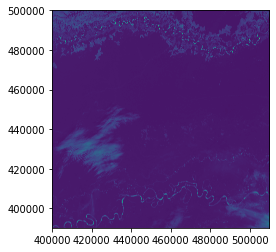

array([[1998, 1990, 1969, ..., 1399, 1592, 1648],
       [1994, 1954, 1930, ..., 1553, 1735, 1646],
       [1956, 1938, 1948, ..., 1556, 1872, 1662],
       ...,
       [1231, 1976, 2576, ..., 2096, 2110, 2110],
       [1282, 2382, 2386, ..., 2076, 2096, 2084],
       [1450, 2546, 2086, ..., 2040, 2066, 2056]], dtype=uint16)

In [6]:
#number of raster bands
band4.count
#number of raster columns
band4.width
#number of raster rows
band4.height
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation

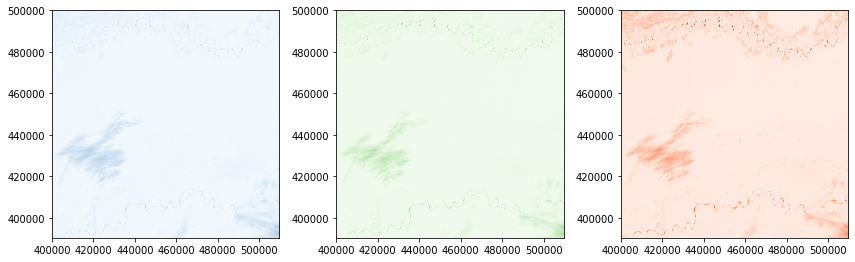

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

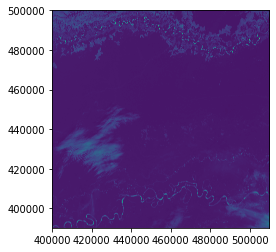

<AxesSubplot:>

In [9]:
#export true color image
trueColor = rasterio.open('./SentinelTrueColor2.tiff','w',driver='Gtiff',
     width=band4.width, height=band4.height,
     count=3,
     crs=band4.crs,
     transform=band4.transform,
     dtype=band4.dtypes[0]
)
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()
src = rasterio.open(r"./SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [ ]:
#export false color image
falseColor = rasterio.open('./SentinelFalseColor.tiff', 'w', driver='Gtiff',
     width=band2.width, height=band2.height,
     count=3,
     crs=band2.crs,
     transform=band2.transform,
     dtype='uint16'                   
)
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()
#generate histogram
trueColor = rasterio.open('./SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")